<a href="https://colab.research.google.com/github/jhancuch/sba-loan-credit-analysis/blob/main/eda/eda_sba_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets and combine

In [2]:
data1 = pd.read_csv('https://data.sba.gov/dataset/0ff8e8e9-b967-4f4e-987c-6ac78c575087/resource/02e2e83a-2af1-4ce8-91db-85e20ffadbf7/download/foia-7afy2010-fy2019-asof-220331.csv', 
                    encoding = "ISO-8859-1", low_memory = False)

data2 = pd.read_csv('https://data.sba.gov/dataset/0ff8e8e9-b967-4f4e-987c-6ac78c575087/resource/c71ba6cf-b4e0-4e60-98f0-48aeaf4c6460/download/foia-7afy2020-present-asof-220331.csv', 
                    encoding = "ISO-8859-1", low_memory = False)

data = pd.concat([data1, data2], ignore_index=True).reset_index(drop=True)

In [3]:
# subset to observations with the LoanStatus PIF or CHGOFF aka paid in full or charged off. We don't care about loans that are currently being paid back
df = data[(data['LoanStatus'] == 'PIF') | (data['LoanStatus'] == 'CHGOFF')].reset_index(drop=True)

# convert PIF to 0 and CHGOFF to 1
df.loc[df['LoanStatus'] == 'PIF', 'LoanStatus'] = '0' 
df.loc[df['LoanStatus'] == 'CHGOFF', 'LoanStatus'] = '1'
df['LoanStatus'] = df['LoanStatus'].astype(int)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318229 entries, 0 to 318228
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AsOfDate               318229 non-null  int64  
 1   Program                318229 non-null  object 
 2   BorrName               318218 non-null  object 
 3   BorrStreet             318229 non-null  object 
 4   BorrCity               318229 non-null  object 
 5   BorrState              318229 non-null  object 
 6   BorrZip                318229 non-null  int64  
 7   BankName               318229 non-null  object 
 8   BankStreet             318228 non-null  object 
 9   BankCity               318228 non-null  object 
 10  BankState              318228 non-null  object 
 11  BankZip                318228 non-null  object 
 12  GrossApproval          318229 non-null  float64
 13  SBAGuaranteedApproval  318229 non-null  float64
 14  ApprovalDate           318229 non-nu

## Loan Characteristics 

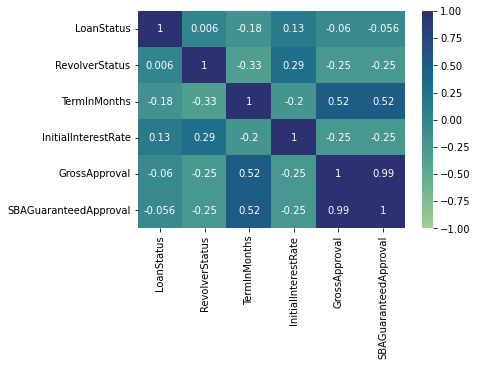

In [5]:
sns.heatmap(df[['LoanStatus', 'RevolverStatus', 'TermInMonths', 'InitialInterestRate', 'GrossApproval', 'SBAGuaranteedApproval']].corr(), vmin = -1, vmax = 1, annot=True, cmap = 'crest')
plt.show()

In [6]:
df_ProjectCounty = pd.get_dummies(df['ProjectCounty'], prefix = 'ProjectCounty_')

In [7]:
dependent_var = df[['LoanStatus']]

for i in range(0, len(df_ProjectCounty.columns), 200):
    end = i + 200
    results = df_ProjectCounty.iloc[:, i:end].merge(dependent_var, how='inner', left_index=True, right_index=True).corr().iloc[0, 1:].sort_values(ascending=False)
    print(results[0])
    print(results[-1])

0.0017282373938727325
-0.00027433364124977087
0.0038491763643353333
-0.0003082652021533479
-2.199846645519885e-05
-0.0036848839198786757
-9.427321635819198e-06
-0.0015791367081928423
-8.888150110746072e-06
-0.001488822027083497
-8.888150110746328e-06
-0.0014888220270834424
0.0041304040315815705
-0.0008161357352523896
-1.6628728819368064e-05
-0.0010312376170784705
-5.442815372603136e-06
-0.000911706408545304
0.003518530674345556
-0.0007601242636431209


## Company Characteristics

In [9]:
df['JobsDummy'] = 0
df.loc[df.JobsSupported > 0, 'JobsDummy'] = 1


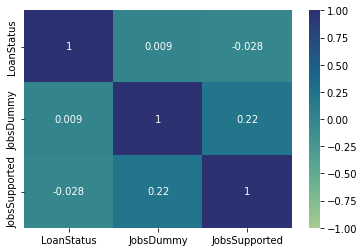

In [10]:
sns.heatmap(df[['LoanStatus', 'JobsDummy', 'JobsSupported']].corr(), vmin = -1, vmax = 1, annot=True, cmap = 'crest')
plt.show()

In [ ]:
df_borrZips = pd.merge(df[['LoanStatus']], pd.get_dummies(df['BorrZip'], prefix = 'BorrZip_'), how='inner', left_index = True, right_index = True)

In [ ]:
results = df_borrZips.corr().iloc[0, 1:].sort_values(ascending=False)
print(results[0])
print(results[-1])

0.006552790785740015
-0.0032388945831462934
-3.142401045790955e-06
-3.887864049187442e-05
-2.4343190573503125e-05
-0.0003417782302139486
-1.937218723321158e-05
-0.00020413394106296776
-4.4440331598456724e-06
-5.897297963418375e-05
-7.026666512302091e-06
-7.235589751006584e-05
-5.442815372603154e-06
-5.8631510563734785e-05
-7.697339599933672e-06
-7.013513784543977e-05
-4.4440331598456945e-06
-4.4889659005649655e-05
-6.284831715844348e-06
-6.25429169689338e-05
-6.284831715844393e-06
-6.770194318801105e-05
-6.284831715844385e-06
-0.00010945135421142163
-1.3332434651656093e-05
-0.00014607681905828813
-3.1424010457908794e-06
-2.8975330585290428e-05
-1.5712597743529493e-05
-0.00019692655947696843
-3.1424010457908912e-06
-2.4343190573504203e-05
-1.1330301726796654e-05
-0.00013833613027467592
-2.060746161643673e-05
-0.00024125571196089793
-1.3697795999874e-05
-0.00011379459777244458
-8.888150110746304e-06
-6.158345819457872e-05
-1.5070946951853272e-05
-0.00013481538245518603
-4.444033159845569

KeyboardInterrupt: 

In [ ]:
borrName - # of loans in a year, # of loans total, BorrZi, DeliveryMethod, subpgmdesc, naicscode, franchise, businesstype, jobsupported

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318229 entries, 0 to 318228
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AsOfDate               318229 non-null  int64  
 1   Program                318229 non-null  object 
 2   BorrName               318218 non-null  object 
 3   BorrStreet             318229 non-null  object 
 4   BorrCity               318229 non-null  object 
 5   BorrState              318229 non-null  object 
 6   BorrZip                318229 non-null  int64  
 7   BankName               318229 non-null  object 
 8   BankStreet             318228 non-null  object 
 9   BankCity               318228 non-null  object 
 10  BankState              318228 non-null  object 
 11  BankZip                318228 non-null  object 
 12  GrossApproval          318229 non-null  float64
 13  SBAGuaranteedApproval  318229 non-null  float64
 14  ApprovalDate           318229 non-nu

## Bank Characteristics

In [ ]:
same zip as loan, same state as loan, bankname, bankzip, number of loans issued during that year, number of total loans issued, percent default during the year, % default overall

## Feature Engineering